# Can you make the image smile again?

In [1]:
import numpy as np
import pandas as pd
import pylab as pl

In [3]:
full_df = pd.read_csv('./dataset/full.csv')
train_df = pd.read_csv('./dataset/train.csv')
test_df = pd.read_csv('./dataset/test.csv')

# Here is the original image

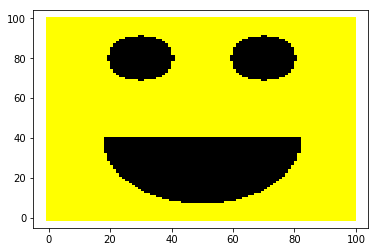

In [5]:
for color in ['yellow', 'black']:
    pl.scatter(full_df[full_df.color==color].x, full_df[full_df.color==color].y, c=color, marker=',', edgecolors='none')
pl.show()

# But I've lost some data from the image :(

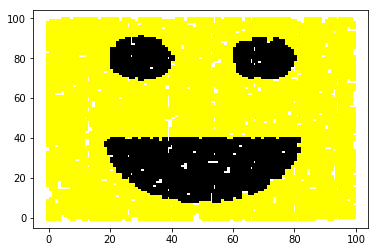

In [4]:
for color in ['yellow', 'black']:
    pl.scatter(train_df[train_df.color==color].x, train_df[train_df.color==color].y, c=color, marker=',', edgecolors='none')
pl.show()

# Can you help me recover my original image?

In [ ]:
# hint: what kind of problem is this? regression/classification/clustering
# 